# Ejercicio 3
## Alumno: Marcelo Alberto Sanchez Zaragoza

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
import csv
from math import sqrt
import statistics as stats
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Marcelo Sanchez\\Downloads')

In [3]:
info = pd.read_csv('reviews_text_caract.csv',encoding='latin1')
info

file  categoria sentimiento
0        coches_no_1_11.txt     coches          no
1        coches_no_1_13.txt     coches          no
2        coches_no_1_15.txt     coches          no
3        coches_no_1_18.txt     coches          no
4        coches_no_1_19.txt     coches          no
..                      ...        ...         ...
395  peliculas_yes_5_23.txt  peliculas         yes
396   peliculas_yes_5_4.txt  peliculas         yes
397   peliculas_yes_5_5.txt  peliculas         yes
398   peliculas_yes_5_7.txt  peliculas         yes
399   peliculas_yes_5_9.txt  peliculas         yes

[400 rows x 3 columns]

In [4]:
info.iloc[1,:]

file           coches_no_1_13.txt
categoria                  coches
sentimiento                    no
Name: 1, dtype: object

In [5]:
## no quitar esto
import os
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
englishStemm=SnowballStemmer("english").stem
spanishStemm=SnowballStemmer("spanish").stem
import spacy
sp_es = spacy.load('es_core_news_sm')
sp_en = spacy.load('en_core_web_sm')

#import pattern
#from pattern.es import lemma as spanishlemma
#from pattern.en import lemma as englishlemma

nltk.download('stopwords')
from nltk.corpus import stopwords
stopEnglish=set(stopwords.words('english'))
stopSpanish=set(stopwords.words('spanish'))
#stopSpanish

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def listdir_fullpath(d):
    return [os.path.join(d, f) for f in sorted_alphanumeric(os.listdir(d))]


class preprocesaTexto():
    def __init__(self, idioma,_tokeniza=False,_aMinusculas=True,
                 _aMayusculas=False,_removerPuntuacion=True,_removerCaracteresRaros=True,
                 _quitarNumeros=True,_lematiza=False,_stemming=False,_quitarAcentos=False,
                 _remueveStop=False,_muestraCambios=False):
        self.idioma =idioma
        self._tokeniza=_tokeniza
        self._aMinusculas=_aMinusculas
        self._aMayusculas=_aMayusculas
        self._removerPuntuacion=_removerPuntuacion
        self._removerCaracteresRaros=_removerCaracteresRaros
        self._quitarNumeros=_quitarNumeros
        self._lematiza=_lematiza
        self._stemming=_stemming
        self._quitarAcentos =_quitarAcentos
        self._remueveStop =_remueveStop
        self._muestraCambios=_muestraCambios
    """ codigo... """ 
    def tokeniza(self,texto):
        return word_tokenize(texto)

    def aMinusculas(self,texto):
        if(self.idioma== 'es'):
            ans=""
            for c in texto:
                if c=='Á' : c='á'
                if c=='É' : c='é'
                if c=='Í' : c='í'
                if c=='Ó' : c='ó'
                if c=='Ú' : c='ú'
                if c=='Ñ' : c='ñ'
                if c=='Ü' : c='ü'
                ans+=c
            return ans.lower()
        else:
            return texto.lower()

    def aMayusculas(self,texto):
        if self.idioma == 'es':
            ans=""
            for c in texto:
                if c=='á' : c='Á'
                if c=='é' : c='É'
                if c=='í' : c='Í'
                if c=='ó' : c='Ó'
                if c=='ú' : c='Ú'
                if c=='ñ' : c='Ñ'
                if c=='ü' : c='Ü'
                ans+=c
            return 'perro'#ans.upper()
        else:
            return texto.upper()

    def quitarAcentos(self,texto):
        if self.idioma == 'es':
            ans=""
            for c in texto:
                if c=='á' : c='a'
                if c=='é' : c='e'
                if c=='í' : c='i'
                if c=='ó' : c='o'
                if c=='ú' : c='u'
                if c=='Á' : c='A'
                if c=='É' : c='E'
                if c=='Í' : c='I'
                if c=='Ó' : c='O'
                if c=='Ú' : c='U'
                ans+=c
            return ans
        else:
            return texto

    def removerPuntuacion(self,texto):
        puntuacion=string.punctuation
        if self.idioma=='es': 
            puntuacion+="¡¿"
            temp=""
            for c in texto:
                if not c in puntuacion:
                      temp+=c
        return temp

    def removerCaracteresRaros(self,texto):
        buenos=string.printable
        if self.idioma=='es': 
            buenos+="¡¿áéíóúÁÉÍÓÚÑñÜü"
            temp=""
            for c in texto:
                if c in buenos:
                    temp+=c
        return temp

    def quitarNumeros(self,texto):
        temp=""
        for c in texto:
            if not c.isdigit():
                  temp+=c
        return temp

    def lematiza(self,texto):
        temp=[]
        if self.idioma== 'es':
            doc = sp_es(texto)
            for token in doc:
                temp.append(token.lemma_)
                temp.append(" ")
        else :
            doc = sp_en(texto)
            for token in doc:
                temp.append(token.lemma_)
                temp.append(" ")
        return "".join(temp)

    def stemming(self,texto):
        palabras=word_tokenize(texto)
        temp=[]
        if self.idioma== 'es':
            for pal in palabras:
                  temp.append(spanishStemm(pal))
            temp.append(" ")
        else :
            for pal in palabras:
                  temp.append(englishStemm(pal))
            temp.append(" ")
        return "".join(temp)

    def remueveStop(self,texto):
        palabras=word_tokenize(texto)
        temp=[]
        if self.idioma== 'es':
            for pal in palabras:
                  if pal not in stopSpanish:
                    temp.append(pal)
                    temp.append(" ")
        else :
            for pal in palabras:
                  if pal not in stopEnglish:
                    temp.append(pal)
                    temp.append(" ")
        return "".join(temp)

    def preprocesa(self,texto):
        ans=texto
        if self._muestraCambios : print("Inicial:\n", ans)
        if self._removerCaracteresRaros : 
            ans=self.removerCaracteresRaros(ans)
        if self._muestraCambios : print("Quitando caracteres raros:\n", ans)
        if self._removerPuntuacion : 
            ans=self.removerPuntuacion(ans)
        if self._muestraCambios :print("Quitando signos de puntuacion:\n", ans)
        if self._quitarNumeros : 
            ans=self.quitarNumeros(ans)
        if self._muestraCambios : print("Quitando numeros:\n", ans)
        if self._aMinusculas : 
            ans=self.aMinusculas(ans)
        if self._muestraCambios : print("Convirtiendo a minusculas:\n", ans)  
        if self._aMayusculas : 
            ans=self.aMayusculas(ans)
        if self._muestraCambios : print("Convirtiendo a mayusculas:\n", ans)
        if self._remueveStop : 
            ans=self.remueveStop(ans)
        if self._muestraCambios : print("Quitando stop words:\n", ans)
        if self._quitarAcentos : 
            ans=self.quitarAcentos(ans)
        if self._muestraCambios : print("Quitando acentos:\n", ans)
        if self._lematiza : 
            ans=self.lematiza(ans)
        if self._muestraCambios : print("Lematizando:\n", ans)
        if self._stemming : 
            ans=self.stemming(ans)
        if self._muestraCambios : print("Stemming:\n", ans)
        if self._tokeniza : 
            ans=self.tokeniza(ans)
        if self._muestraCambios : print("Tokenizando:\n", ans)
        if self._muestraCambios : print("Final:\n", ans)
        return ans 

[nltk_data] Downloading package punkt to C:\Users\Marcelo
[nltk_data]     Sanchez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Marcelo
[nltk_data]     Sanchez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#from my_functions import *
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=False,
                                _remueveStop=False, _stemming=False, _lematiza=False, _removerPuntuacion=True)
txt = '¡Hola!, mi nombre es Ángel Adrián Domínguez Lozano, me compre unos 5 pingüinos, ¿Tú quieres uno?.'
txt_prep = preprocesador.preprocesa(txt)
print(txt)
print(txt_prep)

¡Hola!, mi nombre es Ángel Adrián Domínguez Lozano, me compre unos 5 pingüinos, ¿Tú quieres uno?.
hola mi nombre es angel adrian dominguez lozano me compre unos 5 pingüinos tu quieres uno


In [7]:
preprocesador.preprocesa(txt)

'hola mi nombre es angel adrian dominguez lozano me compre unos 5 pingüinos tu quieres uno'

### Comenzamos con el ejercicio

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os.path import isfile, join

ruta = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Tarea_5\all_files'

contenido = os.listdir(ruta)

In [1]:
archivos = [nombre for nombre in contenido if isfile(join(ruta, nombre))]

NameError: name 'contenido' is not defined

In [10]:
textos = []
#p = np.empty((1, 2))
for r in range(400):
    im = open(join(ruta, archivos[r]), "r")
    #archivo = open("archivo.txt")
    linea = im.readlines()
    #linea = list(im)
    #print(linea)
    p = [linea, r]
    #p[0,0] = linea
    #p[0,1] = r
    textos.append(p)#(linea)
    #textos[r,1] = r
    #textos.append(str(linea))
    #im=0
    #im = open(join(ruta, archivos[r]), "r")
    #lines = []
    #c = 5
    #for line in im:
     #   print(c)
     #   lines.append(line)
    #im.close()
#textos

In [11]:
textos

[[['Me compre este coche en el 2000.No lo he utilizado mucho.Actualmente (agosto 2002) tiene 22.800 km.Con solo 22.000,averia del embrague 70.000 ptas.Que dice Seat at.cliente? ha pasado la garantia no se hacen cargo,a pesar,que el mecanico me dijo que NO se debia a mal uso por mi parte.Lo arreglo.Resulta que el pedal,una vez arreglado,no sube del todo.Me lo vuelven a arreglar y actualmente sigue mal.Tiene ujnh ruido en los bajos que parece un concierto.No m atrevo a viajar de vacaciones con el.Muy normal con un coche de 20 años pero con este de 22.000 km? de risa.Eso si,asimila el aceite q es una maravilla!!! 6 litros hasta hoy.Ahoira llevo 2 meses sin mirar el deposito y estara por la mitad calculo yo.Una ganga este coche!!! Mantenerlo sale a precio d Audi.Ideal para gente joven.Gracias (bap_555@hotmail.com) '],
  0],
 [['Un 147 jtd 115CV: Lo ví y ya no miré más, ¡¡¡y cuantas veces me he arrepentido!!!\n',
   'Señales de pilotos de averías? TODAS (AIRBAG, ABS, ASR, ESP, SENSOR DE NIV

In [12]:
from random import sample
textos_train = sample(textos, 320)

In [13]:
textos_train

[[['Aqui tenemos un disco bastante antiguo de los smith,correria el año 1982 o asi,a mi gusto no cuenta con ningun temazo y sinceramente no cuenta con ningun tema decentillo para un fan de los aerosmith,cuenta con las siguientes canciones:\n',
   '-Jilbait\n',
   '\n',
   '-Lightning strikes\n',
   '\n',
   '-Bitch´s brew\n',
   '\n',
   '-Bolivian ragammufin\n',
   '\n',
   '-Cry me a river\n',
   '\n',
   '-Joanie´s butterfly\n',
   '\n',
   '-Rock in a hard palace\n',
   '\n',
   '-Jig is up\n',
   '\n',
   '-Push comes to sove\n',
   'Disco escrito durante momentos duros del grupo,pero que no consigue sacarlos del atolladero,personalmente no recomiendo este disco a nadie,excepto a un fan fan por puro coleccionismo.\n',
   '\n',
   'Recomendaria Get a Grip o Nine Lives o el mejor de todos para mi el recopilatorio One '],
  267],
 [['En junio me compré un ordenador de sobremesa de esta marca por una oferta en Hipercor / El Corte Inglés (799 euros - luego vi que se vendía por menos qu

In [14]:
mm = np.array(textos_train)
#m[0,0]
pp = []
for i in range(320):
    pp.append(mm[i,0])
pp

<ipython-input-14-1769ffb4fd54>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mm = np.array(textos_train)


[['Aqui tenemos un disco bastante antiguo de los smith,correria el año 1982 o asi,a mi gusto no cuenta con ningun temazo y sinceramente no cuenta con ningun tema decentillo para un fan de los aerosmith,cuenta con las siguientes canciones:\n',
  '-Jilbait\n',
  '\n',
  '-Lightning strikes\n',
  '\n',
  '-Bitch´s brew\n',
  '\n',
  '-Bolivian ragammufin\n',
  '\n',
  '-Cry me a river\n',
  '\n',
  '-Joanie´s butterfly\n',
  '\n',
  '-Rock in a hard palace\n',
  '\n',
  '-Jig is up\n',
  '\n',
  '-Push comes to sove\n',
  'Disco escrito durante momentos duros del grupo,pero que no consigue sacarlos del atolladero,personalmente no recomiendo este disco a nadie,excepto a un fan fan por puro coleccionismo.\n',
  '\n',
  'Recomendaria Get a Grip o Nine Lives o el mejor de todos para mi el recopilatorio One '],
 ['En junio me compré un ordenador de sobremesa de esta marca por una oferta en Hipercor / El Corte Inglés (799 euros - luego vi que se vendía por menos que eso en otros sitios). Venía 

In [15]:
# se hace el proceso de los datos de entrenamiento
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=False,
                                _remueveStop=True, _stemming=False, _lematiza=False, _removerPuntuacion=True)

corpus_prep = []
r = 0
for txt in pp:
    #print(r)
    txt_prep = preprocesador.preprocesa(str(txt))
    corpus_prep.append(txt_prep)
    #r+=1

In [16]:
#Nos sirve para encontrar los indices de los de entrenamiento
nn = np.array(textos_train)
#m[0,0]
qq = []
for i in range(320):
    qq.append(nn[i,1])
#qq

<ipython-input-16-e2efd4571517>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nn = np.array(textos_train)


In [17]:
indextest = []
for i in range(400):  # buscamos los numeros que no salieron en el anterior
    if (np.array(qq)==i).sum()==0: 
        indextest.append(i)
#indextest

In [18]:
## Encontramos los datos de prueba 
x_test=[]
for i in range(80):
    x_test.append(textos[indextest[i]])
#x_test

In [19]:
vv = np.array(x_test)
#m[0,0]
ww = []
for i in range(80):
    ww.append(vv[i,0])
#ww

<ipython-input-19-84ecf2bac126>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  vv = np.array(x_test)


In [20]:
corpus_prep3 = []
for txt in ww:
    #print(txt)
    txt_prep = preprocesador.preprocesa(str(txt))
    corpus_prep3.append(txt_prep)

In [21]:
#corpus_prep

In [22]:
# Se vuelve a correr para quitar acentos 
corpus_prep2 = []
for txt in corpus_prep:
    #print(txt)
    txt_prep = preprocesador.preprocesa(str(txt))
    corpus_prep2.append(txt_prep)
#corpus_prep2

### Inciso a)
Encontramos una representación matricial de los textos, es decir una tabla de frecuencias

Datos de entrenamiento.

In [23]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
#vectorizer = CountVectorizer(lowercase=True, ngram_range= (2,2), binary=False, max_features=10000)
X = vectorizer.fit_transform(corpus_prep2)
X = vectorizer.fit_transform(corpus_prep2)
bow = X.toarray()
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names())
bow_df

01  03  07  10  100  1000  10000  100000  100n  1010n  ...  zona  zonan  \
0     0   0   0   0    0     0      0       0     0      0  ...     0      0   
1     0   0   0   0    0     1      0       0     0      0  ...     0      0   
2     0   0   0   0    0     0      0       0     0      0  ...     0      0   
3     0   0   0   0    0     0      0       0     0      0  ...     0      0   
4     0   0   0   0    0     0      0       0     0      0  ...     0      0   
..   ..  ..  ..  ..  ...   ...    ...     ...   ...    ...  ...   ...    ...   
315   0   0   0   0    0     0      0       0     0      0  ...     0      0   
316   0   0   0   0    0     0      0       0     0      0  ...     0      0   
317   0   0   0   0    0     0      0       0     0      0  ...     0      0   
318   0   0   0   0    0     1      0       0     0      0  ...     0      0   
319   0   0   0   0    0     0      0       0     0      0  ...     0      0   

     zonas  zoom  zumbido  zumo  zumos  ñoñan  ñoñas  ñoño  
0        0     0        0     0      0      0      0     0  
1        0     0        0     0      0      0      0     0  
2        0     0        0     0      0      0      0     0  
3        0     0        0     0      0      0      0     0  
4        0     0        0     0      0      0      0     0  
..     ...   ...      ...   ...    ...    ...    ...   ...  
315      0     0        0     0      0      0      0     0  
316      0     0        0     0      0      0      0     0  
317      0     0        0     0      0      0      0     0  
318      0     0        0     0      0      0      0     0  
319      0     0        0     0      0      0      0     0  

[320 rows x 10000 columns]

Datos de prueba

In [24]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
#vectorizer = CountVectorizer(lowercase=True, ngram_range= (2,2), binary=False, max_features=10000)
X = vectorizer.fit_transform(corpus_prep3)
#X = vectorizer.fit_transform(corpus_prep3)
bow2 = X.toarray()
bow_df2 = pd.DataFrame(bow2,columns=vectorizer.get_feature_names())
bow_df2

03  10  100  1000  101  1011  105  1050  106  10665  ...  ziggetyzag  \
0    0   0    0     0    0     0    0     0    0      0  ...           0   
1    0   0    1     0    0     0    0     0    0      0  ...           0   
2    0   0    0     0    0     0    0     0    0      0  ...           0   
3    0   0    0     0    0     0    0     0    0      0  ...           0   
4    0   1    0     0    0     0    0     0    0      0  ...           0   
..  ..  ..  ...   ...  ...   ...  ...   ...  ...    ...  ...         ...   
75   0   0    0     0    0     0    0     0    0      0  ...           0   
76   0   0    0     0    0     0    0     0    0      0  ...           0   
77   0   0    0     0    0     0    0     0    0      0  ...           0   
78   0   0    0     0    0     0    0     0    0      0  ...           0   
79   0   0    0     0    0     0    0     0    0      0  ...           0   

    ziggy  zimmer  zo  zombie  zona  zonas  zoom  zumos  zwan  
0       0       0   0       0     0      0     0      0     0  
1       0       0   0       0     0      0     0      0     0  
2       0       0   0       0     0      0     0      0     0  
3       0       0   0       0     0      0     0      0     0  
4       0       0   0       0     0      0     0      0     0  
..    ...     ...  ..     ...   ...    ...   ...    ...   ...  
75      0       0   0       0     0      0     0      0     0  
76      0       0   0       0     0      0     0      0     0  
77      0       0   0       0     0      0     0      0     0  
78      0       0   0       0     0      0     0      0     0  
79      0       0   0       0     0      0     0      0     0  

[80 rows x 7843 columns]

In [25]:
m = bow_df.sum()
m

01        2
03        2
07        2
10       24
100      15
         ..
zumo      2
zumos     1
ñoñan     1
ñoñas     4
ñoño      2
Length: 10000, dtype: int64

In [26]:
dat = {'PC':range(0,10000),'frecuencia':m}
data = pd.DataFrame(dat)
data

PC  frecuencia
01        0           2
03        1           2
07        2           2
10        3          24
100       4          15
...     ...         ...
zumo   9995           2
zumos  9996           1
ñoñan  9997           1
ñoñas  9998           4
ñoño   9999           2

[10000 rows x 2 columns]

In [27]:
data = data.sort_values('frecuencia',ascending=False)
data.head()

PC  frecuencia
si        8004         684
bien       948         311
pelicula  6130         306
solo      8121         303
asi        713         303

In [28]:
data["frecuencia_acumulada"] = (data["frecuencia"].cumsum()/69186)
data

PC  frecuencia  frecuencia_acumulada
si           8004         684              0.009886
bien          948         311              0.014382
pelicula     6130         306              0.018804
solo         8121         303              0.023184
asi           713         303              0.027563
...           ...         ...                   ...
pudiendo     6915           1              0.948357
ml350        4752           1              0.948371
pudieran     6917           1              0.948386
mitologicos  4749           1              0.948400
segoviana    7875           1              0.948414

[10000 rows x 3 columns]

In [511]:
data['x'] = range(0,10000)
data

PC  frecuencia  frecuencia_acumulada     x
si                      8964         679              0.009814     0
pelicula                6392         328              0.014555     1
solo                    9082         323              0.019224     2
bien                    1456         319              0.023834     3
asi                      895         305              0.028243     4
...                      ...         ...                   ...   ...
querriamos              7681           1              0.956118  9995
queso                   7682           1              0.956133  9996
panasonicphilipsetcque  6072           1              0.956147  9997
quidich                 7684           1              0.956162  9998
ayudado                 1189           1              0.956176  9999

[10000 rows x 4 columns]

Text(0.5, 1.0, 'Frecuencia Acumulada')

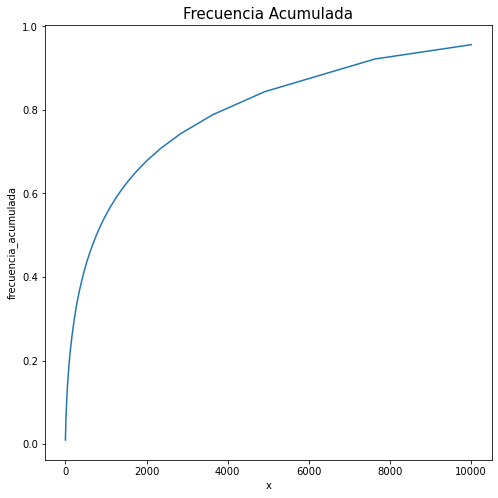

In [512]:
plt.figure(figsize=(8, 8))
sns.lineplot(x="x", y="frecuencia_acumulada", data=data)
plt.title('Frecuencia Acumulada', fontsize=15)

In [513]:
nueva = []
for i in range(4000):
    ind = data.iloc[i,0]
    b = bow_df.iloc[:,ind]
    nueva.append(b)

In [514]:
data2 = pd.DataFrame(nueva)
data2.T

si  pelicula  solo  bien  asi  ser  aunque  hace  coche  dos  ...  light  \
0     4        12     1     6    0    2       4     2      0    2  ...      0   
1     4         0     1     0    0    0       0     1      0    0  ...      0   
2     6         0     0     0    1    0       1     0      0    1  ...      0   
3     0         1     1     0    0    0       0     1      0    0  ...      0   
4     2         0     0     0    1    1       0     1      0    0  ...      0   
..   ..       ...   ...   ...  ...  ...     ...   ...    ...  ...  ...    ...   
315   1         0     0     0    1    0       0     1      0    0  ...      0   
316   0         0     0     0    2    0       0     2      0    0  ...      0   
317   1         1     0     1    1    0       0     2      0    0  ...      0   
318   0         0     1     0    0    0       0     0      0    0  ...      0   
319   0         0     0     0    0    0       0     0      0    0  ...      0   

     catalan  librerias  catalana  catalogo  cargada  llegan  llegaron  \
0          0          0         0         0        0       0         0   
1          0          0         0         0        0       0         0   
2          0          0         0         0        0       0         0   
3          0          0         0         0        0       0         0   
4          0          0         0         0        0       0         0   
..       ...        ...       ...       ...      ...     ...       ...   
315        0          0         0         0        0       0         0   
316        0          0         0         0        0       0         0   
317        0          0         0         0        0       0         0   
318        0          0         0         0        0       0         0   
319        0          0         0         0        0       0         0   

     locura  madrastra  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  
..      ...        ...  
315       0          0  
316       0          0  
317       0          0  
318       0          0  
319       0          0  

[320 rows x 4000 columns]

In [515]:
data2 = data2.T
#data2

### Inciso B)

Realizamos algunos gráficos para observar patrones entre los dintintos grupos de datos

In [516]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(data2, data2)
sim_df = pd.DataFrame(cos_sim)
sim_df

0         1         2         3         4         5         6    \
0    1.000000  0.132405  0.110700  0.100694  0.134776  0.132441  0.239456   
1    0.132405  1.000000  0.125011  0.075974  0.087299  0.110558  0.155839   
2    0.110700  0.125011  1.000000  0.052237  0.133767  0.117824  0.167611   
3    0.100694  0.075974  0.052237  1.000000  0.036478  0.111162  0.093607   
4    0.134776  0.087299  0.133767  0.036478  1.000000  0.099532  0.138961   
..        ...       ...       ...       ...       ...       ...       ...   
315  0.084349  0.066483  0.134085  0.032410  0.099311  0.086467  0.109218   
316  0.125331  0.069149  0.084523  0.078657  0.103294  0.089935  0.143232   
317  0.203639  0.083225  0.074389  0.106502  0.119880  0.199263  0.156042   
318  0.062351  0.063706  0.070083  0.093169  0.085647  0.013558  0.032762   
319  0.028515  0.069923  0.033653  0.063914  0.092326  0.000000  0.063678   

          7         8         9    ...       310       311       312  \
0    0.070190  0.085523  0.082989  ...  0.294120  0.122789  0.075130   
1    0.041308  0.073156  0.105821  ...  0.122803  0.164235  0.070857   
2    0.030295  0.061700  0.295510  ...  0.117940  0.160599  0.103933   
3    0.120824  0.071327  0.023810  ...  0.125434  0.000000  0.027634   
4    0.079335  0.070251  0.070351  ...  0.144132  0.078856  0.145159   
..        ...       ...       ...  ...       ...       ...       ...   
315  0.062655  0.027741  0.166681  ...  0.082046  0.114175  0.075233   
316  0.057022  0.040394  0.067420  ...  0.096868  0.151142  0.089429   
317  0.044119  0.054694  0.052164  ...  0.240461  0.073088  0.068111   
318  0.121577  0.133973  0.047916  ...  0.061195  0.000000  0.018538   
319  0.018534  0.019694  0.032870  ...  0.047227  0.036844  0.031792   

          313       314       315       316       317       318       319  
0    0.104351  0.119797  0.084349  0.125331  0.203639  0.062351  0.028515  
1    0.038770  0.221523  0.066483  0.069149  0.083225  0.063706  0.069923  
2    0.221785  0.098009  0.134085  0.084523  0.074389  0.070083  0.033653  
3    0.022680  0.056344  0.032410  0.078657  0.106502  0.093169  0.063914  
4    0.089353  0.115612  0.099311  0.103294  0.119880  0.085647  0.092326  
..        ...       ...       ...       ...       ...       ...       ...  
315  0.097030  0.126001  1.000000  0.113625  0.059173  0.057977  0.069601  
316  0.082572  0.085470  0.113625  1.000000  0.073855  0.015076  0.082734  
317  0.024845  0.100297  0.059173  0.073855  1.000000  0.020412  0.000000  
318  0.030429  0.056695  0.057977  0.015076  0.020412  1.000000  0.017150  
319  0.031311  0.051856  0.069601  0.082734  0.000000  0.017150  1.000000  

[320 rows x 320 columns]

In [517]:
mm[2,1]

55

In [518]:
criterio = []
criterio2 = []
for i in range(320):
    ii = mm[i,1]
    #print(ii)
    cosa = info.iloc[ii,1]
    cosa2 = info.iloc[ii,2]
    criterio.append(cosa)
    criterio2.append(cosa2)

In [519]:
pr = pd.DataFrame(sim_df.iloc[:,2:5])

pr['Nombre'] = criterio
pr['Sentimiento'] = criterio2

#pr['Nombre'] = info.iloc[0:300,1]
#pr['Sentimiento'] = info.iloc[0:300,2]


pr.columns = ['d1','d2','d3','Categoria','Sentimiento']
pr

d1        d2        d3    Categoria Sentimiento
0    0.110700  0.100694  0.134776    peliculas          no
1    0.125011  0.075974  0.087299      moviles          no
2    1.000000  0.052237  0.133767      hoteles          no
3    0.052237  1.000000  0.036478       musica          no
4    0.133767  0.036478  1.000000  ordenadores          no
..        ...       ...       ...          ...         ...
315  0.134085  0.032410  0.099311      hoteles          no
316  0.084523  0.078657  0.103294    lavadoras         yes
317  0.074389  0.106502  0.119880    peliculas         yes
318  0.070083  0.093169  0.085647       musica          no
319  0.033653  0.063914  0.092326       coches         yes

[320 rows x 5 columns]

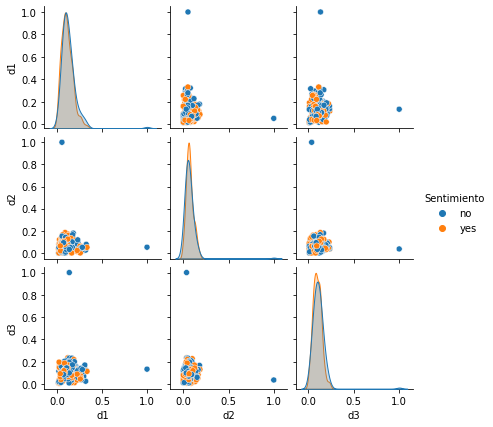

In [520]:
sns.pairplot(pr, height=2, hue = 'Sentimiento')

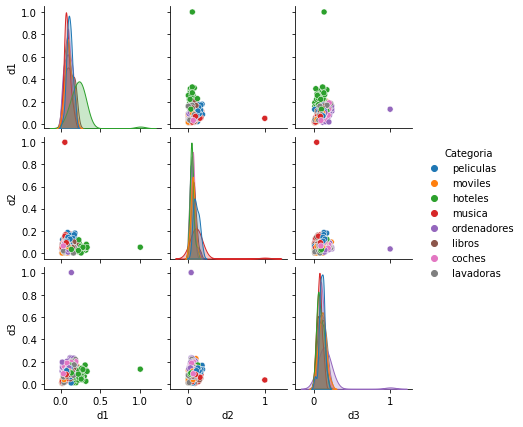

In [521]:
sns.pairplot(pr, height=2, hue = 'Categoria')

### Inciso b)

In [568]:
from sklearn.decomposition import KernelPCA

scaler = StandardScaler(with_mean=True,with_std=True)
estandar = scaler.fit_transform(sim_df)#(data2) sim_df # ingresamos la matriz con distancias coseno

sigma = 0.05
kpca = KernelPCA(n_components=6, kernel='cosine', gamma=1/sigma) ##linear,poly,rbf,sigmoid-b,cosine,precomputed
# rbf - 0.1, 1ya
# sigmoid - 2.5, 1ya
# cosine - 1, 0.5, 2.5
# linear 1.5
# poly 1.5
mesh_kpca = kpca.fit_transform(estandar)#sim_df # estandar

In [569]:
tabla_2 = pd.DataFrame(mesh_kpca)
tabla_2['Nombre'] = criterio
tabla_2['Sentimiento'] = criterio2
tabla_2.columns = ['kpc1','kpc2','kpc3','kpc4','kpc5','kpc6','Categoria','Sentimiento']

In [570]:
tabla_2

kpc1      kpc2      kpc3      kpc4      kpc5      kpc6    Categoria  \
0    0.730753 -0.283552 -0.094349  0.070043 -0.053777 -0.065652    peliculas   
1    0.136641  0.187437 -0.015141 -0.165298  0.373637 -0.069647      moviles   
2    0.246686  0.218508  0.514772  0.395890  0.032733  0.236462      hoteles   
3   -0.214109 -0.371141 -0.082055 -0.107473 -0.045354  0.037478       musica   
4    0.076242  0.252815 -0.054849 -0.144107  0.143425  0.030991  ordenadores   
..        ...       ...       ...       ...       ...       ...          ...   
315 -0.186512  0.053454  0.323725  0.304969  0.026020  0.015223      hoteles   
316 -0.130741  0.328893 -0.436799  0.305226 -0.096519 -0.071536    lavadoras   
317  0.241506 -0.301832 -0.129181  0.091791 -0.036640 -0.184564    peliculas   
318 -0.420417 -0.417221 -0.116085 -0.150222  0.025089  0.322873       musica   
319 -0.580239 -0.067531 -0.038741 -0.073687 -0.074166 -0.156236       coches   

    Sentimiento  
0            no  
1            no  
2            no  
3            no  
4            no  
..          ...  
315          no  
316         yes  
317         yes  
318          no  
319         yes  

[320 rows x 8 columns]

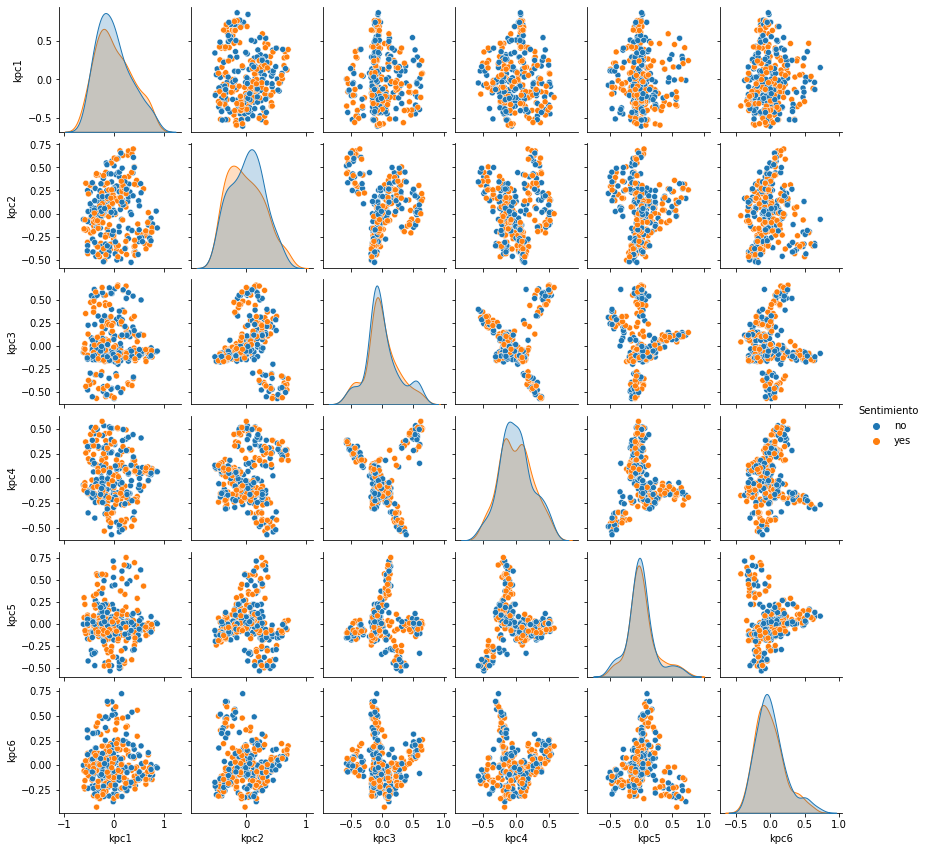

In [571]:
sns.pairplot(tabla_2, height=2, hue = 'Sentimiento');
# funciona bien para las categorias con un kernel lineal con 2.05 kpc1 y kcp2 
# poly con 2.05

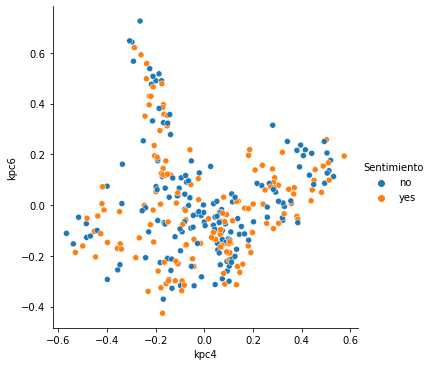

In [572]:
sns.relplot(x='kpc4', y='kpc6', hue='Sentimiento',data=tabla_2)

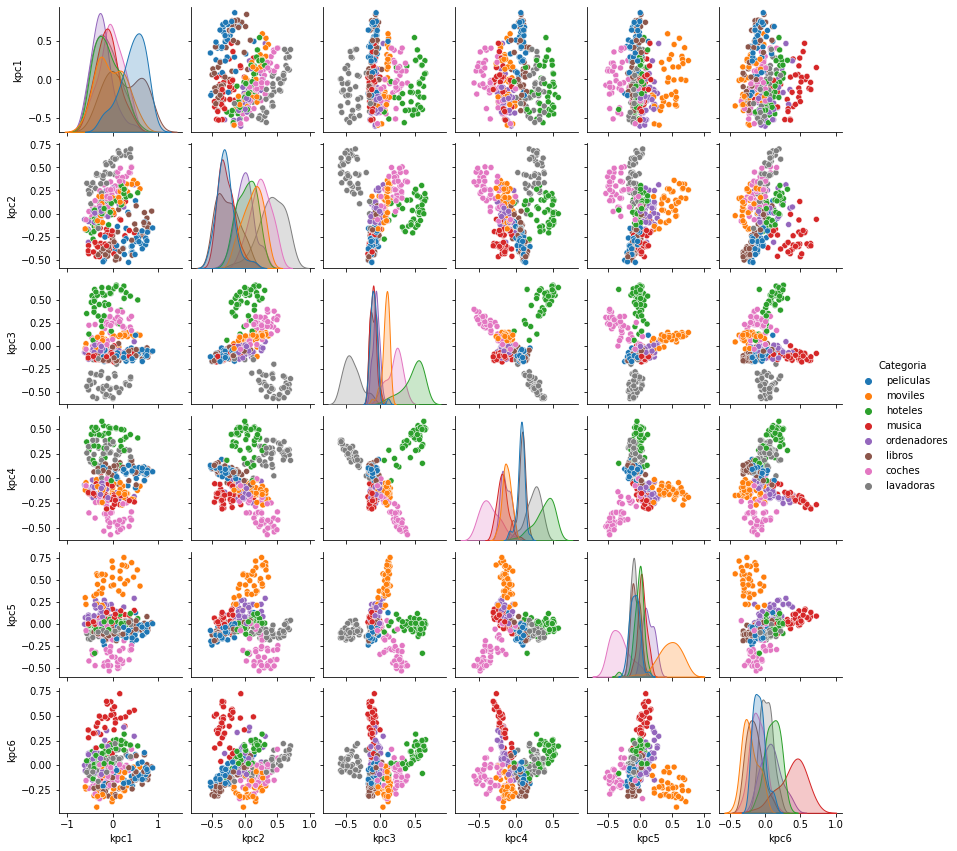

In [573]:
sns.pairplot(tabla_2, height=2, hue = 'Categoria');
# se utilizo un cosine con 2.05, 0.05
# poly funciona muy bien para 0.005

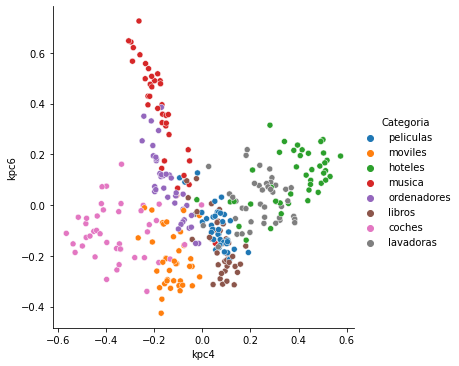

In [574]:
sns.relplot(x='kpc4', y='kpc6', hue='Categoria',data=tabla_2)

Se observo que algunos kernel funcionan muy bien para nuestros datos por lo que podemos empezar con kernel cosine y despues intentar trabajar los datos con poly.

### Inciso c)

Ahora vamos a aplicar métodos de clustering para poder encontrar el grupo de cada dato. Nos vamos a basar el los datos que encontramos con kernel pca con un kernel cosine y un kernel poly.

In [595]:
sigma = 2.05
kpca = KernelPCA(n_components=6, kernel='cosine', gamma=1/sigma) ##linear,poly,rbf,sigmoid-b,cosine,precomputed
mesh_kpca1 = kpca.fit_transform(tsne_dataset.iloc[:,0:2])# sim_df

In [596]:
sigma = 0.05
kpca = KernelPCA(n_components=6, kernel='poly', gamma=1/sigma) ##linear,poly,rbf,sigmoid-b,cosine,precomputed
mesh_kpca2 = kpca.fit_transform(tsne_dataset.iloc[:,0:2]) #tsne_dataset

In [597]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = kmeans.fit_predict(sim_df)
y_km2 = kmeans.fit_predict(sim_df)

In [598]:
from sklearn import metrics
#criterio - categoria
#criterio2 - Sentimiento
#print(metrics.classification_report(criterio, y_km))
tabla_2['y_km'] = y_km

In [599]:
tabla_2['y_km2'] = y_km2

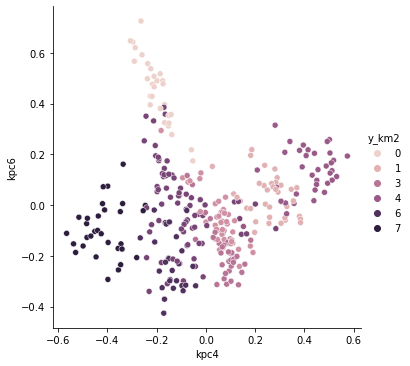

In [600]:
#sns.pairplot(x='kpc1',y='kpc2',data=tabla_2 ,height=2, hue = 'y_km')
sns.relplot(x='kpc4', y='kpc6', hue='y_km2',data=tabla_2)

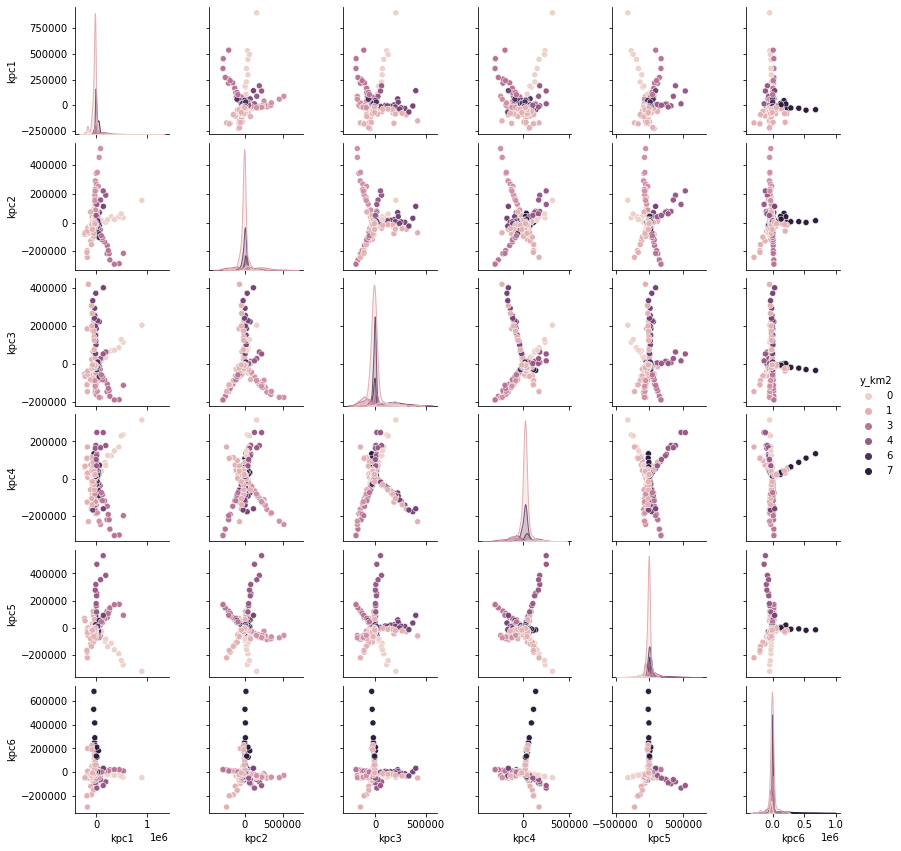

In [172]:
tabla_2['y_km2'] = y_km2
sns.pairplot(tabla_2, height=2, hue = 'y_km2');

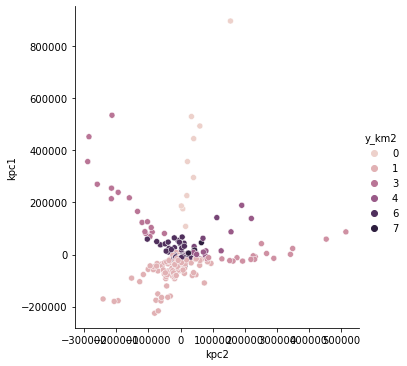

In [173]:
sns.relplot(x='kpc2', y='kpc1', hue='y_km2',data=tabla_2)

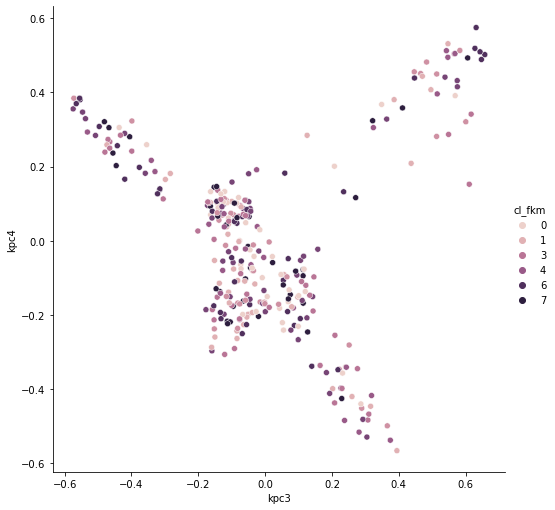

In [603]:
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans
fuzzy_kmeans = FuzzyKMeans(k=8, m=2)
fuzzy_kmeans.fit(tsne_dataset.iloc[:,0:2])# tsne_dataset.iloc[:,0:2] mesh_kpca1
data_toy_fkm = pd.DataFrame(tabla_2).assign(cl_fkm = fuzzy_kmeans.labels_)
sns.relplot(x='kpc3', y='kpc4', data = data_toy_fkm, hue='cl_fkm', height=7,
           legend = 'brief')

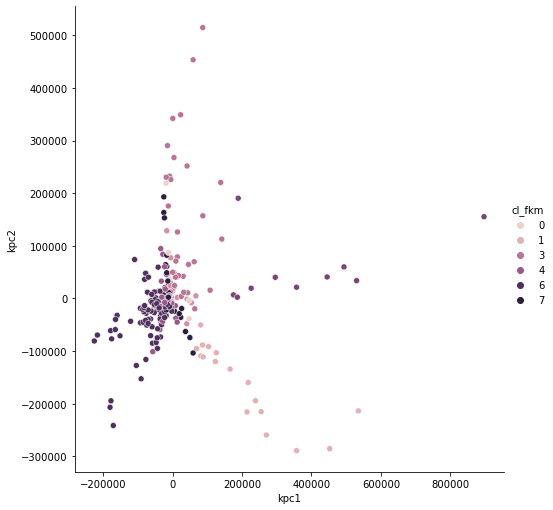

In [174]:
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans
fuzzy_kmeans = FuzzyKMeans(k=8, m=2)
fuzzy_kmeans.fit(mesh_kpca2) #
data_toy_fkm = pd.DataFrame(tabla_2).assign(cl_fkm = fuzzy_kmeans.labels_)
sns.relplot(x='kpc1', y='kpc2', data = data_toy_fkm, hue='cl_fkm', height=7,
           legend = 'brief')

In [588]:
from sklearn.manifold import SpectralEmbedding
model2 = SpectralEmbedding(n_components = 5, affinity ='rbf', gamma = 0.1, eigen_solver = 'arpack', n_neighbors = 3).fit(sim_df) # mesh_kpca1 data2 sim_df
data_vecs_se = pd.DataFrame(dict(x1=model2.embedding_[:,0], x2 = model2.embedding_[:,1], x3 = model2.embedding_[:,2], x4 = model2.embedding_[:,3], x5 = model2.embedding_[:,4], cl = criterio))


<AxesSubplot:xlabel='x4', ylabel='x2'>

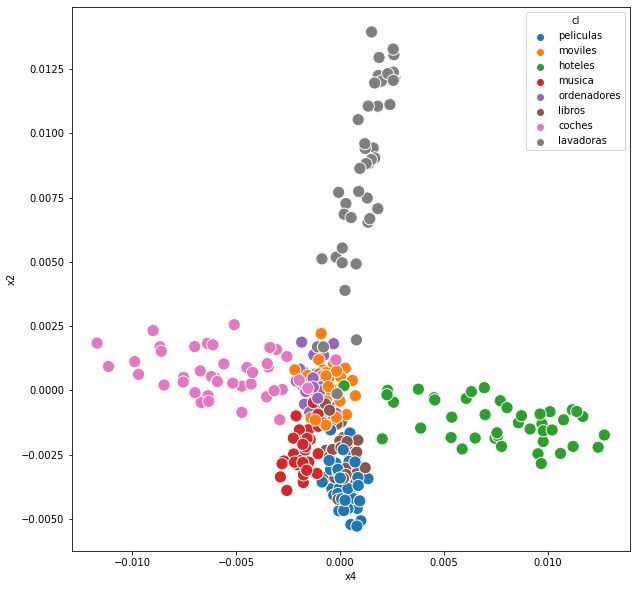

In [592]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='x4', y='x2', data = data_vecs_se, hue='cl', s=150, legend = 'brief')

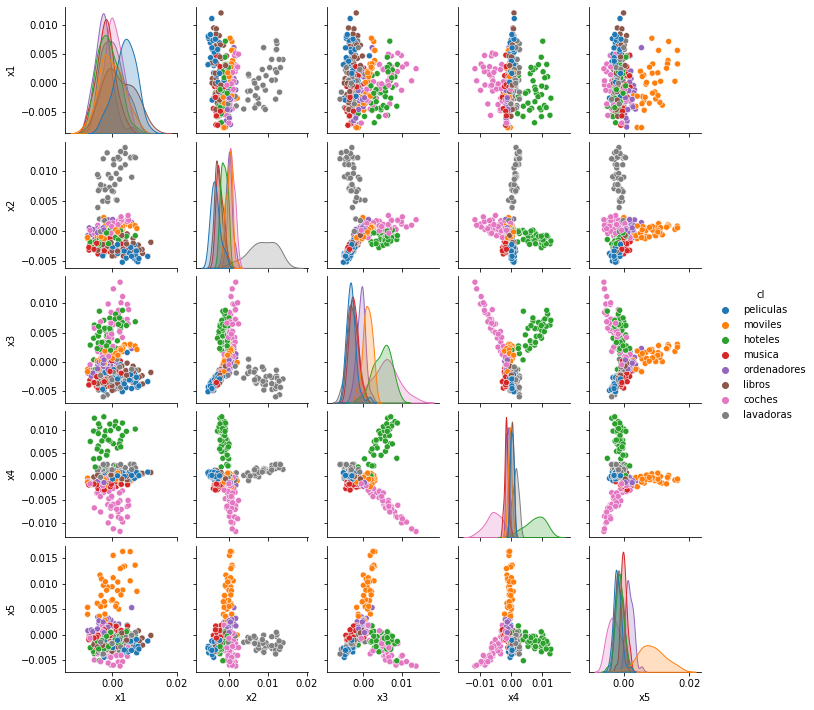

In [590]:
sns.pairplot(data_vecs_se, height=2, hue = 'cl');

In [ ]:
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

In [369]:
from sklearn.manifold import TSNE
### estandarizamos los datos
scaler = StandardScaler(with_mean=True,with_std=True)
p = scaler.fit_transform(mesh_kpca1)

#np.random.seed(0)
tsne = TSNE(n_components=2,perplexity=10)
X_tsne = tsne.fit_transform(sim_df)#sim_df

# 90

#X_embedded = TSNE(n_components=3, perplexity=1500).fit_transform(X_sphere)
#X_embedded.shape

In [370]:
tsne_dataset = pd.DataFrame({'comp1': X_tsne[:, 0], 'comp2': X_tsne[:, 1], 'categoria':criterio})

In [593]:
#tsne_dataset

comp1      comp2  categoria sentimiento
0    14.837915  24.673244     coches         yes
1    19.389561  25.289711     coches          no
2    19.170839 -22.593811     libros         yes
3    -4.918675 -21.585938     musica         yes
4    12.231549 -49.363449  peliculas          no
..         ...        ...        ...         ...
315  19.457375 -16.436947     libros         yes
316  45.370285   2.078147    hoteles         yes
317   0.258153   3.400371     coches          no
318  16.581928  31.451622     coches         yes
319  42.353767   1.277170    hoteles          no

[320 rows x 4 columns]

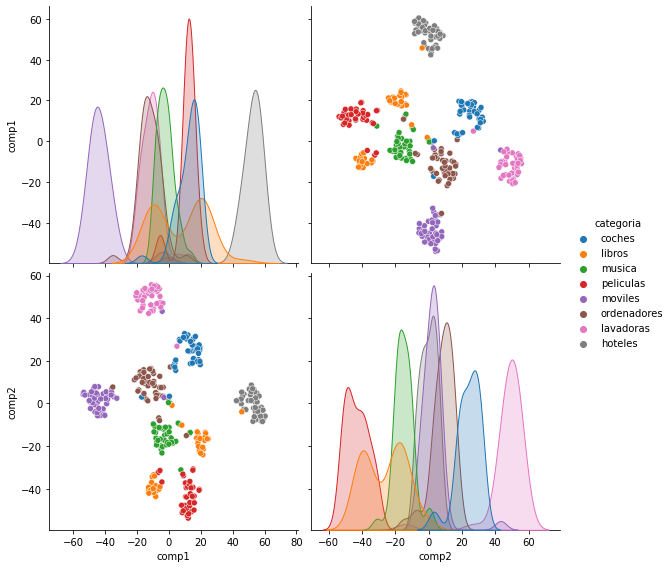

In [371]:
sns.pairplot(tsne_dataset, height=4, hue = 'categoria');

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

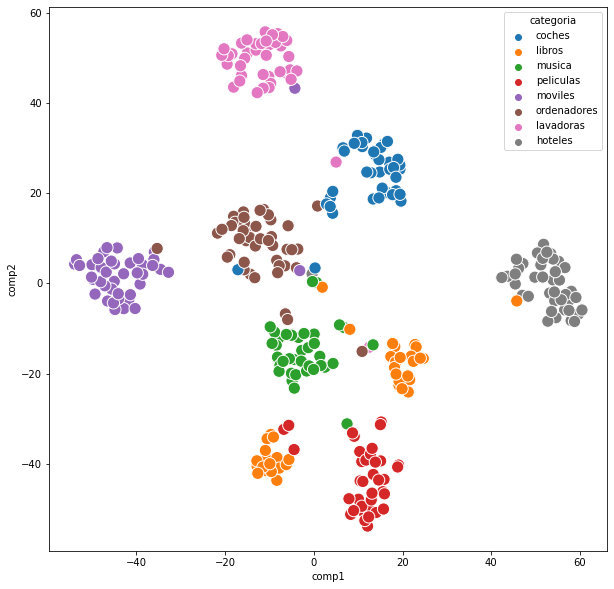

In [372]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='comp1', y='comp2', data = tsne_dataset, hue='categoria', s=150, legend = 'brief')

In [373]:
tsne_dataset['sentimiento'] = criterio2

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

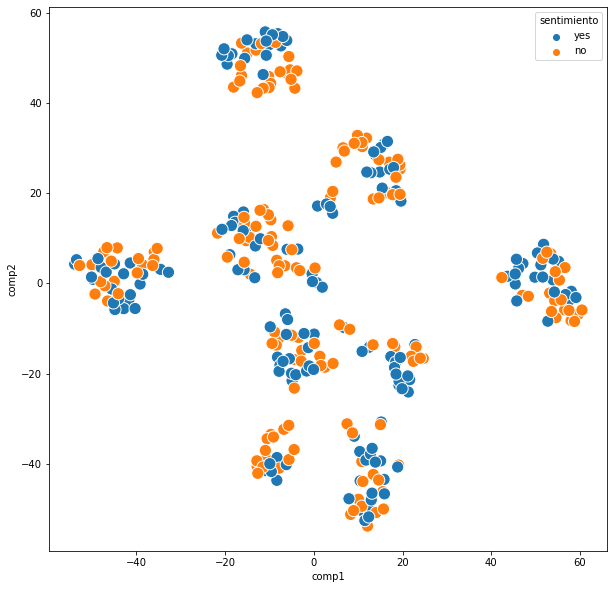

In [374]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='comp1', y='comp2', data = tsne_dataset, hue='sentimiento', s=150, legend = 'brief')

### Inciso d)

In [213]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [313]:
m2 = bow_df2.sum()
m2

01       1
010      1
03       1
10       8
100      5
        ..
zo       1
zona     4
zonan    1
zoom     2
ñoñas    1
Length: 6730, dtype: int64

In [314]:
dat02 = {'PC2':range(0,6730),'frecuencia':m2}
data02 = pd.DataFrame(dat02)
data02

PC2  frecuencia
01        0           1
010       1           1
03        2           1
10        3           8
100       4           5
...     ...         ...
zo     6725           1
zona   6726           4
zonan  6727           1
zoom   6728           2
ñoñas  6729           1

[6730 rows x 2 columns]

In [315]:
data02 = data02.sort_values('frecuencia',ascending=False)
data02.head()

PC2  frecuencia
si        5807         164
pelicula  4711          92
bien       846          90
ser       5766          62
aunque     695          58

In [317]:
data02["frecuencia_acumulada"] = (data02["frecuencia"].cumsum()/16440)
data02

PC2  frecuencia  frecuencia_acumulada
si         5807         164              0.009976
pelicula   4711          92              0.015572
bien        846          90              0.021046
ser        5766          62              0.024818
aunque      695          58              0.028345
...         ...         ...                   ...
exactos    2647           1              0.999757
exacto     2646           1              0.999818
exactitud  2645           1              0.999878
ex         2643           1              0.999939
ñoñas      6729           1              1.000000

[6730 rows x 3 columns]

In [318]:
data02['x'] = range(0,6730)
data02

PC2  frecuencia  frecuencia_acumulada     x
si         5807         164              0.009976     0
pelicula   4711          92              0.015572     1
bien        846          90              0.021046     2
ser        5766          62              0.024818     3
aunque      695          58              0.028345     4
...         ...         ...                   ...   ...
exactos    2647           1              0.999757  6725
exacto     2646           1              0.999818  6726
exactitud  2645           1              0.999878  6727
ex         2643           1              0.999939  6728
ñoñas      6729           1              1.000000  6729

[6730 rows x 4 columns]

In [319]:
nueva2 = []
for i in range(4000):
    ind = data02.iloc[i,0]
    b = bow_df2.iloc[:,ind]
    nueva2.append(b)

In [320]:
data03 = pd.DataFrame(nueva2)
data03.T

si  pelicula  bien  ser  aunque  solo  coche  hace  menos  libro  ...  \
0    0         0     0    0       0     1      3     0      0      0  ...   
1    0         0     0    0       0     1      2     0      0      0  ...   
2    2         0     1    1       0     1      4     0      0      0  ...   
3    2         0     1    0       0     0      5     1      1      0  ...   
4    3         0     0    0       0     1      2     0      0      0  ...   
..  ..       ...   ...  ...     ...   ...    ...   ...    ...    ...  ...   
75   3         2     0    0       0     0      0     0      0      0  ...   
76  11        12     2    6       5     1      0     4      1      4  ...   
77   2         4     1    0       1     0      0     0      0      0  ...   
78   3        18     1    3       2     6      0     3      3      1  ...   
79   5         7     3    4      10     1      0     2      5      0  ...   

    reproductor  represiva  represento  representativo  reposabrazos  \
0             0          0           0               0             0   
1             0          0           0               0             0   
2             0          0           0               0             0   
3             0          0           0               0             0   
4             0          0           0               0             0   
..          ...        ...         ...             ...           ...   
75            0          0           0               0             0   
76            0          0           0               0             0   
77            0          0           0               0             0   
78            0          0           0               0             0   
79            0          0           0               0             0   

    reponerlo  replay  repetiria  repetido  repelen  
0           0       0          0         0        0  
1           0       0          0         0        0  
2           0       0          0         0        0  
3           0       0          0         0        0  
4           0       0          0         0        0  
..        ...     ...        ...       ...      ...  
75          0       0          0         0        0  
76          0       0          0         0        0  
77          0       0          0         0        0  
78          0       0          0         0        0  
79          0       0          0         0        0  

[80 rows x 4000 columns]

In [321]:
ddd = data03.T
ddd

si  pelicula  bien  ser  aunque  solo  coche  hace  menos  libro  ...  \
0    0         0     0    0       0     1      3     0      0      0  ...   
1    0         0     0    0       0     1      2     0      0      0  ...   
2    2         0     1    1       0     1      4     0      0      0  ...   
3    2         0     1    0       0     0      5     1      1      0  ...   
4    3         0     0    0       0     1      2     0      0      0  ...   
..  ..       ...   ...  ...     ...   ...    ...   ...    ...    ...  ...   
75   3         2     0    0       0     0      0     0      0      0  ...   
76  11        12     2    6       5     1      0     4      1      4  ...   
77   2         4     1    0       1     0      0     0      0      0  ...   
78   3        18     1    3       2     6      0     3      3      1  ...   
79   5         7     3    4      10     1      0     2      5      0  ...   

    reproductor  represiva  represento  representativo  reposabrazos  \
0             0          0           0               0             0   
1             0          0           0               0             0   
2             0          0           0               0             0   
3             0          0           0               0             0   
4             0          0           0               0             0   
..          ...        ...         ...             ...           ...   
75            0          0           0               0             0   
76            0          0           0               0             0   
77            0          0           0               0             0   
78            0          0           0               0             0   
79            0          0           0               0             0   

    reponerlo  replay  repetiria  repetido  repelen  
0           0       0          0         0        0  
1           0       0          0         0        0  
2           0       0          0         0        0  
3           0       0          0         0        0  
4           0       0          0         0        0  
..        ...     ...        ...       ...      ...  
75          0       0          0         0        0  
76          0       0          0         0        0  
77          0       0          0         0        0  
78          0       0          0         0        0  
79          0       0          0         0        0  

[80 rows x 4000 columns]

In [322]:
# LDA
scaler = StandardScaler(with_mean=True,with_std=True)
estandar = scaler.fit_transform(sim_df)

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(data2, criterio).predict(ddd)

In [345]:
#indextest
criterio_test = []
criterio2_test = []
for i in range(80):
    ii = indextest[i]#mm[i,1]
    #print(ii)
    cosa = info.iloc[ii,1]
    #print(cosa,"c",ii)
    cosa2 = info.iloc[ii,2]
    criterio_test.append(cosa)
    criterio2_test.append(cosa2)

In [346]:
confusion_matrix = metrics.confusion_matrix(criterio_test, y_pred)
print(confusion_matrix)

[[0 0 1 0 3 3 6 0]
 [0 0 1 0 1 0 5 1]
 [0 0 0 0 5 0 4 1]
 [1 0 3 1 2 1 3 0]
 [2 1 0 0 2 1 1 0]
 [1 1 0 0 3 2 7 0]
 [1 0 0 0 0 2 4 0]
 [1 1 0 1 2 0 3 2]]


In [347]:
print(metrics.classification_report(criterio_test, y_pred))

              precision    recall  f1-score   support

      coches       0.00      0.00      0.00        13
     hoteles       0.00      0.00      0.00         8
   lavadoras       0.00      0.00      0.00        10
      libros       0.50      0.09      0.15        11
     moviles       0.11      0.29      0.16         7
      musica       0.22      0.14      0.17        14
 ordenadores       0.12      0.57      0.20         7
   peliculas       0.50      0.20      0.29        10

    accuracy                           0.14        80
   macro avg       0.18      0.16      0.12        80
weighted avg       0.19      0.14      0.12        80



In [348]:
# CDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(data2, criterio).predict(ddd)
#y_QDA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [349]:
confusion_matrix = metrics.confusion_matrix(criterio_test, y_QDA)
print(confusion_matrix)

[[1 0 0 4 2 0 4 2]
 [0 0 1 1 2 1 3 0]
 [2 0 1 3 1 0 2 1]
 [0 0 0 2 1 0 4 4]
 [1 1 3 2 0 0 0 0]
 [2 2 1 1 2 1 3 2]
 [0 0 0 2 0 2 2 1]
 [1 2 0 0 0 2 1 4]]


In [351]:
print(metrics.classification_report(criterio_test, y_QDA))

              precision    recall  f1-score   support

      coches       0.14      0.08      0.10        13
     hoteles       0.00      0.00      0.00         8
   lavadoras       0.17      0.10      0.12        10
      libros       0.13      0.18      0.15        11
     moviles       0.00      0.00      0.00         7
      musica       0.17      0.07      0.10        14
 ordenadores       0.11      0.29      0.15         7
   peliculas       0.29      0.40      0.33        10

    accuracy                           0.14        80
   macro avg       0.13      0.14      0.12        80
weighted avg       0.14      0.14      0.13        80



In [352]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='newton-cg', C = 1e9)

In [353]:
logreg.fit(data2, criterio)

LogisticRegression(C=1000000000.0, solver='newton-cg')

In [355]:
y_pred = logreg.predict(ddd)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(ddd, criterio_test)))

Accuracy of logistic regression classifier on test set: 0.20


# Volvemos a hacer el inciso d)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [30]:
os.chdir('/Users/Marcelo Sanchez/Desktop/Segundo semestre CIMAT/Ciencia de Datos/Tarea_5/all_files') # Mio
corpus_corpus=[]
s = ' '  # Aqui lo que hacemos leer todos los documento
#for i in dftrain['file']: # Los ponemos en un solo vector con las caracteristicas
for i in info['file']:  # Se utiliza todo 
    #print(i)
    corpus_prep = []
    reader = csv.reader(open(i),delimiter='.') # Leerlo
    for row in reader:
        corpus_prep.append(preprocesador.preprocesa(s.join(row))) # Unir con el procesamiento
    corpus_corpus.append(s.join(corpus_prep))

In [31]:
corpus_corpus

['compre coche 2000 utilizado actualmente agosto 2002 22 800 km solo 22 000averia embrague 70 000 ptas dice seat at cliente pasado garantia hacen cargoa pesarque mecanico dijo debia mal uso parte arreglo resulta pedaluna vez arregladono sube vuelven arreglar actualmente sigue mal ujnh ruido bajos parece concierto m atrevo viajar vacaciones normal coche 20 años 22 000 km risa siasimila aceite q maravilla 6 litros hoy ahoira llevo 2 meses mirar deposito estara mitad calculo ganga coche mantenerlo sale precio d audi ideal gente joven gracias bap555hotmail com ',
 '147 jtd 115cv vi mire cuantas veces arrepentido  señales pilotos averias todas airbag abs asr esp sensor nivel aceite queda alguna  problema saben arreglarlo si señor saben sistema mierda ultima vez semana taller monto darle contactoalli pilotitos encendidos dicen deje vez semana pues coche compre viajar  seguimos selector velocidad funciona da gana montas sabes si viaje podras poner  seguimos pintura dan acuarela cagadita gorri

In [40]:
corpus_train, corpus_test = train_test_split(corpus_corpus, test_size=0.2, train_size=0.8, random_state=42)

vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

y = np.array(info.iloc[:,1:])
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

In [41]:
X_test.shape

(80, 10000)

In [608]:
#scaler = StandardScaler(with_mean=True,with_std=True)
#estandar = scaler.fit_transform()

#### entrenamiento ############
y_train_categoria = y_train[:,0]
y_train_sentimiento = y_train[:,1]


#### prueba ############
y_test_categoria = y_test[:,0]
y_test_sentimiento = y_test[:,1]


lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train_sc, y_train_categoria).predict(X_test_sc)

In [609]:
print(metrics.classification_report(y_test_categoria, y_pred))

              precision    recall  f1-score   support

      coches       0.75      0.69      0.72        13
     hoteles       1.00      1.00      1.00        13
   lavadoras       0.91      0.91      0.91        11
      libros       0.64      1.00      0.78         7
     moviles       0.67      0.75      0.71         8
      musica       0.91      1.00      0.95        10
 ordenadores       0.67      0.80      0.73         5
   peliculas       1.00      0.54      0.70        13

    accuracy                           0.82        80
   macro avg       0.82      0.84      0.81        80
weighted avg       0.85      0.82      0.82        80



In [610]:
confusion_matrix = metrics.confusion_matrix(y_test_categoria, y_pred)
print(confusion_matrix)

[[ 9  0  0  1  2  0  1  0]
 [ 0 13  0  0  0  0  0  0]
 [ 1  0 10  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 1  0  0  0  6  0  1  0]
 [ 0  0  0  0  0 10  0  0]
 [ 1  0  0  0  0  0  4  0]
 [ 0  0  1  3  1  1  0  7]]


In [611]:
e_d = {'Y_apro_QDA':y_pred, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)
ed

Y_apro_QDA     Y_orig
0       moviles    moviles
1        musica     musica
2        coches     coches
3       moviles    moviles
4       hoteles    hoteles
..          ...        ...
75       coches    moviles
76  ordenadores    moviles
77       libros  peliculas
78       libros     libros
79       musica     musica

[80 rows x 2 columns]

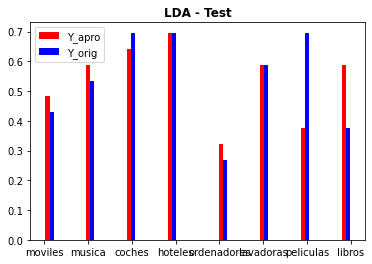

In [617]:
colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('LDA - Test',fontweight ="bold")
  
plt.show()

In [618]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(X_train_sc, y_train_categoria).predict(X_test_sc)
#y_QDA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [619]:
print(metrics.classification_report(y_test_categoria, y_QDA))

              precision    recall  f1-score   support

      coches       0.00      0.00      0.00        13
     hoteles       0.00      0.00      0.00        13
   lavadoras       0.50      0.09      0.15        11
      libros       0.03      0.14      0.06         7
     moviles       0.00      0.00      0.00         8
      musica       0.07      0.10      0.08        10
 ordenadores       0.00      0.00      0.00         5
   peliculas       0.06      0.08      0.07        13

    accuracy                           0.05        80
   macro avg       0.08      0.05      0.04        80
weighted avg       0.09      0.05      0.05        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


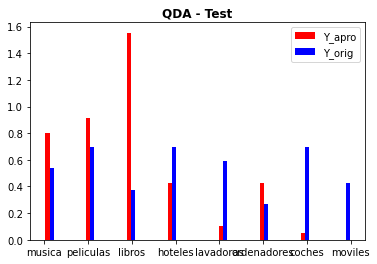

In [623]:
e_d = {'Y_apro_QDA':y_QDA, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)

colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('QDA - Test',fontweight ="bold")
  
plt.show()

In [630]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='newton-cg', C = 1e9)
logreg.fit(X_train_sc, y_train_categoria)

LogisticRegression(C=1000000000.0, solver='newton-cg')

In [631]:
y_pred = logreg.predict(X_test_sc)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_sc, y_test_categoria)))

Accuracy of logistic regression classifier on test set: 0.89


In [632]:
print(metrics.classification_report(y_test_categoria, y_pred))

              precision    recall  f1-score   support

      coches       0.92      0.85      0.88        13
     hoteles       1.00      1.00      1.00        13
   lavadoras       1.00      0.91      0.95        11
      libros       0.78      1.00      0.88         7
     moviles       0.88      0.88      0.88         8
      musica       0.71      1.00      0.83        10
 ordenadores       0.83      1.00      0.91         5
   peliculas       1.00      0.62      0.76        13

    accuracy                           0.89        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.89      0.89        80



In [633]:
confusion_matrix = metrics.confusion_matrix(y_test_categoria, y_pred)
print(confusion_matrix)

[[11  0  0  0  1  1  0  0]
 [ 0 13  0  0  0  0  0  0]
 [ 1  0 10  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  0  0  0  7  0  1  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  5  0]
 [ 0  0  0  2  0  3  0  8]]


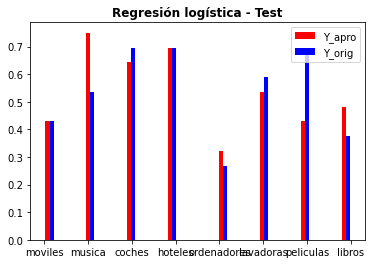

In [634]:
e_d = {'Y_apro_QDA':y_pred, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)

colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Regresión logística - Test',fontweight ="bold")
  
plt.show()

### Sentimiento

In [646]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train_sc, y_train_sentimiento).predict(X_test_sc)

print(metrics.classification_report(y_test_sentimiento, y_pred))

              precision    recall  f1-score   support

          no       0.54      0.78      0.64        36
         yes       0.71      0.45      0.56        44

    accuracy                           0.60        80
   macro avg       0.63      0.62      0.60        80
weighted avg       0.64      0.60      0.59        80



In [647]:
confusion_matrix = metrics.confusion_matrix(y_test_sentimiento, y_pred)
print(confusion_matrix)

[[28  8]
 [24 20]]


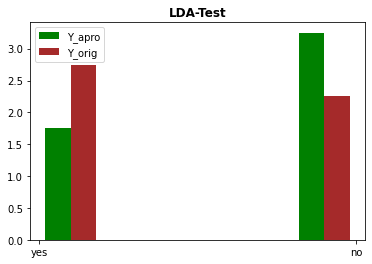

In [648]:
e_d = {'Y_apro_QDA':y_pred, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'brown']

plt.hist(ed, 5, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('LDA-Test',fontweight ="bold")
  
plt.show()

In [644]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(X_train_sc, y_train_sentimiento).predict(X_test_sc)
#y_QDA
print(metrics.classification_report(y_test_sentimiento, y_QDA))

              precision    recall  f1-score   support

          no       0.41      0.39      0.40        36
         yes       0.52      0.55      0.53        44

    accuracy                           0.48        80
   macro avg       0.47      0.47      0.47        80
weighted avg       0.47      0.47      0.47        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


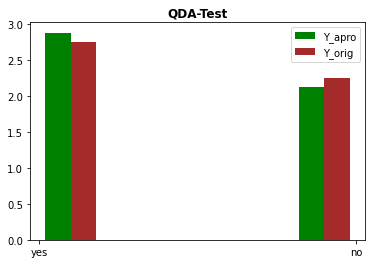

In [645]:
e_d = {'Y_apro_QDA':y_QDA, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'brown']

plt.hist(ed, 5, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('QDA-Test',fontweight ="bold")
  
plt.show()

In [649]:
logreg = LogisticRegression(solver='newton-cg', C = 1e9)
logreg.fit(X_train_sc, y_train_sentimiento)

LogisticRegression(C=1000000000.0, solver='newton-cg')

In [650]:
y_pred = logreg.predict(X_test_sc)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_sc, y_test_sentimiento)))

Accuracy of logistic regression classifier on test set: 0.69


In [651]:
confusion_matrix = metrics.confusion_matrix(y_test_sentimiento, y_pred)
print(confusion_matrix)

[[29  7]
 [18 26]]


In [652]:
print(metrics.classification_report(y_test_sentimiento, y_pred))

              precision    recall  f1-score   support

          no       0.62      0.81      0.70        36
         yes       0.79      0.59      0.68        44

    accuracy                           0.69        80
   macro avg       0.70      0.70      0.69        80
weighted avg       0.71      0.69      0.69        80



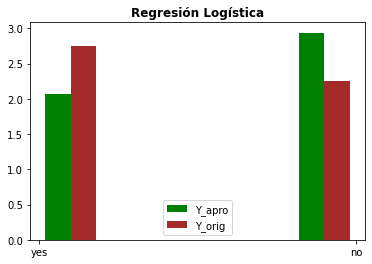

In [653]:
e_d = {'Y_apro_QDA':y_pred, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'brown']

plt.hist(ed, 5, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Regresión Logística',fontweight ="bold")
  
plt.show()